In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | pance
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | oktyabrskiy
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | mitu
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | huarmey
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | paamiut
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | caceres
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | yaan
Processing Record 21 of Set 1 | abha
Processing Record 22 of Set 1 | la asuncion
Processing Record 23 of Set 1 | lebu
Processing Record 24 of Set 1 | hithadhoo
Pr

Processing Record 35 of Set 4 | raudeberg
Processing Record 36 of Set 4 | dzaoudzi
Processing Record 37 of Set 4 | la ronge
Processing Record 38 of Set 4 | vallenar
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | rawson
Processing Record 41 of Set 4 | mayskiy
Processing Record 42 of Set 4 | hvide sande
Processing Record 43 of Set 4 | vao
Processing Record 44 of Set 4 | ambulu
Processing Record 45 of Set 4 | santa rosa
Processing Record 46 of Set 4 | necochea
Processing Record 47 of Set 4 | takoradi
Processing Record 48 of Set 4 | tevaitoa
Processing Record 49 of Set 4 | viligili
City not found. Skipping...
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | lithakia
Processing Record 2 of Set 5 | douglas
Processing Record 3 of Set 5 | west bay
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | fram
Processing Record 6 of Set 5 | zhaotong
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | guerrero negro


Processing Record 29 of Set 8 | navahrudak
Processing Record 30 of Set 8 | moron
Processing Record 31 of Set 8 | tiksi
Processing Record 32 of Set 8 | wagar
Processing Record 33 of Set 8 | padang
Processing Record 34 of Set 8 | alice springs
Processing Record 35 of Set 8 | nishihara
Processing Record 36 of Set 8 | canto do buriti
Processing Record 37 of Set 8 | saldanha
Processing Record 38 of Set 8 | tazovskiy
Processing Record 39 of Set 8 | khandyga
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | plainview
Processing Record 43 of Set 8 | cortez
Processing Record 44 of Set 8 | esmeraldas
Processing Record 45 of Set 8 | shuangcheng
Processing Record 46 of Set 8 | hong gai
Processing Record 47 of Set 8 | saleaula
City not found. Skipping...
Processing Record 48 of Set 8 | longyearbyen
Processing Record 49 of Set 8 | laja
Processing Record 50 of Set 8 | lufilufi
Processing Record 1 of Set 9 | moyobamb

Processing Record 18 of Set 12 | bone
Processing Record 19 of Set 12 | carutapera
Processing Record 20 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 21 of Set 12 | high level
Processing Record 22 of Set 12 | port lincoln
Processing Record 23 of Set 12 | gojo
Processing Record 24 of Set 12 | coruripe
Processing Record 25 of Set 12 | nhulunbuy
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 12 | kerki
City not found. Skipping...
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | port hardy
Processing Record 31 of Set 12 | patea
Processing Record 32 of Set 12 | khakhea
Processing Record 33 of Set 12 | hauterive
Processing Record 34 of Set 12 | solnechnyy
Processing Record 35 of Set 12 | changping
Processing Record 36 of Set 12 | cairns
Processing Record 37 of Set 12 | khagrachari
City not found. Skipping...
Processin

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,64.92,63,97,3.00,AU,2022-01-28 22:09:12
1,Busselton,-33.6500,115.3333,65.05,64,11,7.70,AU,2022-01-28 22:12:14
2,Puerto Ayora,-0.7393,-90.3518,80.56,76,66,9.66,EC,2022-01-28 22:14:12
3,Yellowknife,62.4560,-114.3525,0.41,96,100,7.85,CA,2022-01-28 22:14:12
4,Punta Arenas,-53.1500,-70.9167,71.71,20,0,13.80,CL,2022-01-28 22:13:51
5,Pance,15.6885,120.6201,73.44,90,93,0.51,PH,2022-01-28 22:14:12
6,Cidreira,-30.1811,-50.2056,71.91,63,70,12.44,BR,2022-01-28 22:14:13
7,Oktyabrskiy,54.4815,53.4710,6.31,97,100,2.24,RU,2022-01-28 22:14:13
8,Albany,42.6001,-73.9662,30.15,75,100,6.44,US,2022-01-28 22:10:30
9,Mitu,1.1983,-70.1733,81.97,55,72,2.33,CO,2022-01-28 22:10:01


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

new_city_data_df = city_data_df[new_column_order]

In [10]:
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-01-28 22:09:12,-42.7826,147.0587,64.92,63,97,3.00
1,Busselton,AU,2022-01-28 22:12:14,-33.6500,115.3333,65.05,64,11,7.70
2,Puerto Ayora,EC,2022-01-28 22:14:12,-0.7393,-90.3518,80.56,76,66,9.66
3,Yellowknife,CA,2022-01-28 22:14:12,62.4560,-114.3525,0.41,96,100,7.85
4,Punta Arenas,CL,2022-01-28 22:13:51,-53.1500,-70.9167,71.71,20,0,13.80
...,...,...,...,...,...,...,...,...,...
547,Funadhoo,MV,2022-01-28 22:18:26,6.1500,73.2667,81.50,67,18,17.65
548,Denia,ES,2022-01-28 22:18:27,38.8408,0.1057,55.85,46,26,1.99
549,San Miguel,SV,2022-01-28 22:18:32,13.4833,-88.1833,93.02,32,17,7.07
550,Tucuman,AR,2022-01-28 22:18:32,-26.8241,-65.2226,77.00,57,20,4.61


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

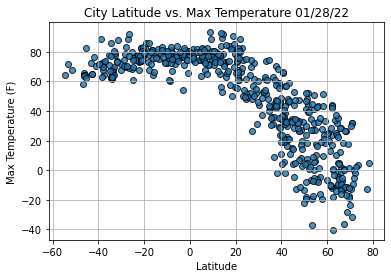

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

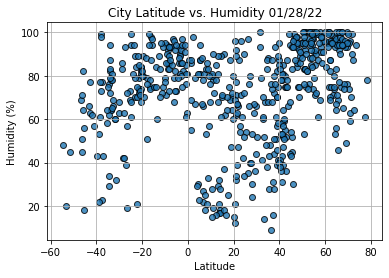

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

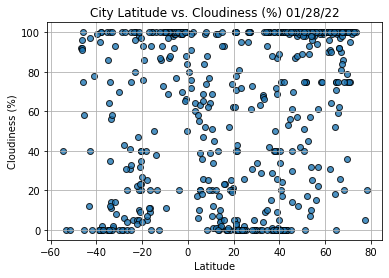

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

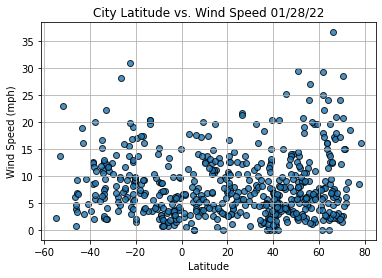

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Yellowknife,62.4560,-114.3525,0.41,96,100,7.85,CA,2022-01-28 22:14:12
5,Pance,15.6885,120.6201,73.44,90,93,0.51,PH,2022-01-28 22:14:12
7,Oktyabrskiy,54.4815,53.4710,6.31,97,100,2.24,RU,2022-01-28 22:14:13
8,Albany,42.6001,-73.9662,30.15,75,100,6.44,US,2022-01-28 22:10:30
9,Mitu,1.1983,-70.1733,81.97,55,72,2.33,CO,2022-01-28 22:10:01


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

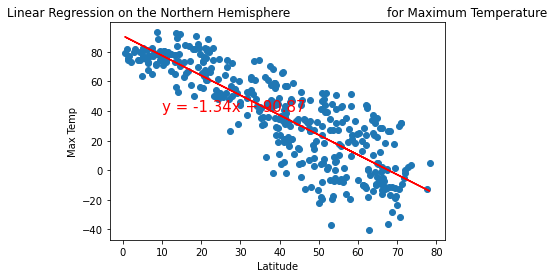

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

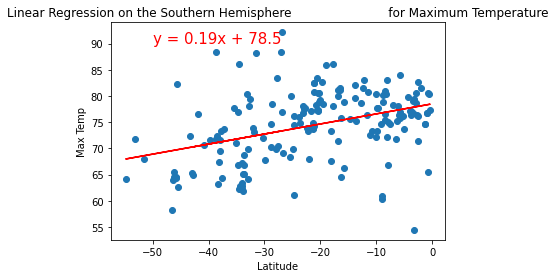

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

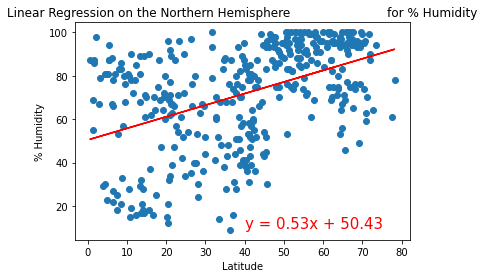

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

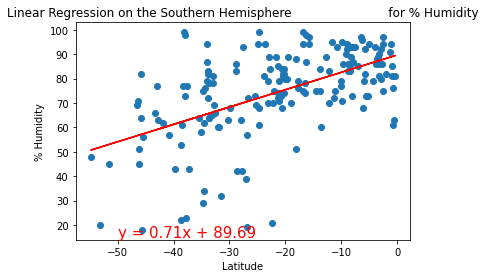

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

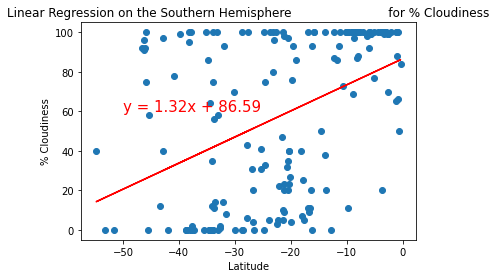

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

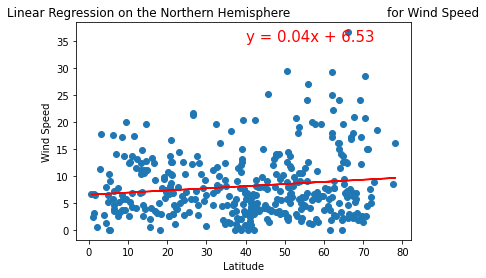

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

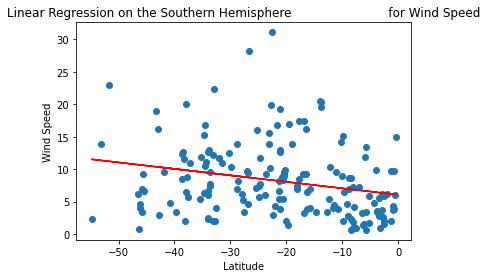

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))